In [ ]:
!pip install sidetable
!pip install tabulate

sns.__version__

In [1]:
import pandas as pd;import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sidetable as stb

from IPython.display import HTML, display
import tabulate
import re
%matplotlib inline

In [ ]:
#df1 = pd.read_csv("new11.csv")
#df1.head()

In [ ]:
#df1 = df1.drop_duplicates()

In [ ]:
#df2 = pd.read_csv("new4.csv")
#df2.head()

In [ ]:
##df1.rename(columns = {'date': 'date_assignment'},inplace=True)

In [ ]:
#df1.drop(['week_from','week_to'],axis=1,inplace=True)

In [ ]:
#df1.info()

In [ ]:
#df2.info()

In [ ]:
#df1_index = df1.set_index(['code_module','code_presentation','id_student'])

In [ ]:
#df2_index = df2.set_index(['code_module','code_presentation','id_student'])

In [ ]:
#df3_index = df1_index.join(df2_index,how='inner')

In [ ]:
#df3_index.shape

In [ ]:
#df3 = df1.merge(df2,how='left',on=['code_module','code_presentation','id_student'])

In [ ]:
#df3.shape

In [ ]:
#df4 = df3.sample(frac=0.002)

In [ ]:
#df4['code_module'].value_counts()

In [ ]:
##df4.shape

In [ ]:
#df4.to_csv('finalds.csv',index=False)

In [ ]:
#df=df4

## Read the data to Pandas Data Frame

In [2]:
df = pd.read_csv("finalds.csv")
df.head()

,code_module,code_presentation,id_student,id_site,date_assignment,sum_click,activity_type,id_assessment,assessment_type,weight,...,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,FFF,2013J,601180,716643,153,1,subpage,34873,TMA,12.5,...,Scotland,HE Qualification,70-80%,35-55,0,60,N,Withdrawn,-45.0,186.0
1,DDD,2013B,369908,547945,140,1,subpage,25346,CMA,3.0,...,Scotland,HE Qualification,70-80%,35-55,0,60,N,Pass,-82.0,NaN
2,EEE,2014B,485920,790934,102,1,url,30714,TMA,16.0,...,East Anglian Region,Lower Than A Level,60-70%,0-35,0,30,N,Pass,-22.0,NaN
3,DDD,2013B,2501479,547816,1,2,url,25343,CMA,3.0,...,Scotland,HE Qualification,40-50%,35-55,0,60,N,Fail,-24.0,NaN
4,DDD,2013J,498821,673519,-15,1,homepage,25348,TMA,10.0,...,Yorkshire Region,Lower Than A Level,20-30%,0-35,0,60,N,Pass,-203.0,NaN


## Data Report

In [3]:
#Shape of the Data
print('****Shape of the hotel data****')
print('********************************')
print('No of rows\t:\t{}\nNo of columns\t:\t{}'.format(df.shape[0],df.shape[1]))

****Shape of the hotel data****
********************************
No of rows	:	165109
No of columns	:	25


In [4]:
print('****Show infomation of the train data****')
print('***********************************')
df.info()

****Show infomation of the train data****
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  object 
 1   code_presentation           165109 non-null  object 
 2   id_student                  165109 non-null  int64  
 3   id_site                     165109 non-null  int64  
 4   date_assignment             165109 non-null  int64  
 5   sum_click                   165109 non-null  int64  
 6   activity_type               165109 non-null  object 
 7   id_assessment               165109 non-null  int64  
 8   assessment_type             165109 non-null  object 
 9   weight                      165109 non-null  float64
 10  module_presentation_length  165109 non-null  int64  
 11  date_submitted              165109 non-null  int64  

In [5]:
#Check for duplicate values
print('****Duplicates data in the train dataset without EmployeeID Column****')
print('**********************************************************************')

dups = df.loc[:, ~df.columns. isin(['EmployeeID'])].duplicated().sum()
if dups ==0:
    print('There is no duplicate values in the data.') 
else:
    print('There are {} duplicates in the data which is {}% of total data'.format(dups,round((dups/df.shape[0])*100,2)))

****Duplicates data in the train dataset without EmployeeID Column****
**********************************************************************
There is no duplicate values in the data.


In [6]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df.isnull().sum()[df.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data ({})'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2),df[msv.index[i]].dtype))

****Missing Values in the Dataset****
*************************************
80 Missing values in score which is 0.05% of total data (float64)
10080 Missing values in imd_band which is 6.11% of total data (object)
1 Missing values in date_registration which is 0.0% of total data (float64)
159096 Missing values in date_unregistration which is 96.36% of total data (float64)


In [7]:
def display_dataframe(df,dtypeval):
    numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, dtypeval))

    # Dict used to center the table headers
    d = dict(selector="th",
        props=[('text-align', 'left')])

    # Style
    display(df.style.set_properties(subset=df.columns[numeric_col_mask], 
                            **{'width':'15em', 'height':'3em','text-align':'left','border-color':'White','border-width':'thin'})\
            .set_properties(subset=df.columns[~numeric_col_mask], 
                            **{'width':'15em', 'text-align':'left','border-color':'White','border-width':'thin'})\
            .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                    subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])\
            .hide_index()\

#            .highlight_max('color: green')\
            .set_table_styles([d])) # center the header

In [8]:
def check_sp(Vars,fixit,data_df):
  tot = len(Vars['num'])+len(Vars['chars'])

  s = [[None for j in range(3)] for i in range(tot)]
  i=0
  for type_var in Vars:
    for var in Vars[type_var]:
      livars=[]
      li=data_df[var].unique()
      if(type_var=='num'):
        livars = list(filter(lambda x: (str(x).replace('.','').isdigit()!=True and str(x)!='nan'),li))
        if(fixit==True):
          for k in livars:
            data_df[var].replace(k,np.nan,inplace=True)
      else:
        li1 = list(filter(lambda x: (str(x).replace(' ','').isalpha()!=True and str(x)!='nan'),li))
        pattern = r'\W'
        
        li2 = []
        for j in li1:
          find = re.compile(pattern)
          ff = find.findall(j.replace(' ',''))[0]
          li2.append(ff)
        livars = list(set(li2))
      s[i][0] = var
      s[i][1] = livars if(livars!=[]) else 'No Special Chars'
      s[i][2] = 'Numeric' if(type_var=='num') else 'Charecter'
      i=i+1
  rdf = pd.DataFrame(data=s,columns=['Column','SpecialChars','DataType'])
  return(rdf)

In [9]:
Vars = {'num': ['date_assignment',
'sum_click',
'weight',
'module_presentation_length',
'date_submitted',
'score',
'num_of_prev_attempts',
'studied_credits',
'date_registration',
'date_unregistration'],

'chars':['code_module',
'code_presentation',
'activity_type',
'assessment_type',
'region',
'highest_education',
'imd_band',
'age_band','final_result'] }

#spdf = check_sp(Vars,True,df)
#display_dataframe(spdf,str)

In [10]:
# df['account_segment'].value_counts()

In [ ]:
# df['Login_device'].value_counts()

In [ ]:
# df['account_segment'].replace('Super +','Super Plus',inplace=True)
# df['account_segment'].replace('Regular +','Regular Plus',inplace=True)
# df['Login_device'].replace('&&&&','Mobile',inplace=True)

# df['Gender'].replace('Male','M',inplace=True)
# df['Gender'].replace('Female','F',inplace=True)

In [ ]:
# spdf = check_sp(Vars,False,df)
# display_dataframe(spdf,str)

In [ ]:
# Vars = {'num': ['Tenure','rev_per_month','cashback','CC_Contacted_LY'],'chars':['Complain_ly','CC_Agent_Score','Service_Score','City_Tier','Account_user_count','coupon_used_for_payment','Day_Since_CC_connect','account_segment','Payment','Gender','Marital_Status','Login_device'] }

# for vars in Vars['chars']:
#   df[vars].fillna(df[vars].mode()[0],inplace=True)

# for vars in Vars['num']:
#   df[vars].fillna(df[vars].median(),inplace=True)
#   if(df[vars].dtype=='object'):
#     df[vars] = df[vars].astype('int64')

In [ ]:
# #Check for missing value
# print('****Missing Values in the Dataset****')
# print('*************************************')
# msv = df.isnull().sum()[df.isnull().sum()>0]
# if msv.empty:
#     print('There is no missing values in the data.') 
# else:
#     for i in range(msv.count()):
#         print('{} Missing values in {} which is {}% of total data ({})'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2),df[msv.index[i]].dtype))

In [11]:
def unq_count_new(df,var,top_val,tit,dpn):
    #var='meal'

    if(top_val == 0):
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn))
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn))
    else:
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        
    disdf = pd.concat([tardisval,round(perclass*100,3)],axis=1)
    disdf.reset_index()
    disdf.columns=['Count','Percent']

    str1 = f'**** Unique value distribution of {tit.title()} ******'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')

    print(tabulate.tabulate(disdf, tablefmt='fancy_grid',headers=[tit.title(),'Count','Percent']))
    #return (disdf)

In [ ]:
# dff=df
# typevar='char'
# var='coupon_used_for_payment'
# tar='Churn'
# tit='coupon_used_for_payment'

# textlab='# of Customers'
# textlab_tar='# of Churn Customers'


# result = dff.groupby([var])[tar].aggregate(np.sum).reset_index().sort_values(tar,ascending = False)
# #print(result[result[tar]>0])
# result = result[result[tar]>0]
# b = sns.barplot(data=result, y=var,x=tar,orient='h',order=result[var])


# b.set_frame_on(False)

# b.set_ylabel('')
# #b.set_ylabel(var,weight='bold')
# b.set_xlabel(textlab_tar,weight='bold')

# b.set_xticklabels([])
# b.tick_params(bottom=False)
# b.set_yticklabels(list(result[var].value_counts().index),weight='bold')
# #b.set_yticklabels([])
# maxwidth = dff[var].value_counts().max()
# for p in b.patches:
#     width = np.nan_to_num(p.get_width()) 
#     wdplace = width
#     per = (width/dff.shape[0])*100
#     wdplace = wdplace + maxwidth * 1/100
    
#     b.text(wdplace,
#         p.get_y()+.5,
#         '{} - ({:1.2f}%)'.format(round(width),(width/dff.shape[0])*100),
#         ha="center",weight='bold') 

In [ ]:
# dff=df
# typevar='char'
# var='coupon_used_for_payment'
# tar='Churn'
# tit='coupon_used_for_payment'

# textlab='# of Customers'
# textlab_tar='# of Churn Customers'

# fig, axis=plt.subplots(nrows=1,ncols=2)
# fig.set_size_inches(15,4)

# a = sns.countplot(data=dff, y=var,ax=axis[0],order=dff[var].value_counts().index)

# a.set_frame_on(False)

# #a.set_ylabel(var,weight='bold')
# a.set_ylabel('')
# a.set_xlabel(textlab,weight='bold')


# a.set_xticklabels([])
# a.tick_params(bottom=False)
# a.set_yticklabels(list(dff[var].value_counts().index),weight='bold')

# maxwidth = dff[var].value_counts().max()

# for p in a.patches:
#     width = np.nan_to_num(p.get_width()) 
#     wdplace = width
#     per = (width/dff.shape[0])*100
#     #print(width)
#     wdplace = wdplace + maxwidth * 10/100
#     # if(per < 1):
#     #     wdplace = wdplace + maxwidth * 10/100
#     # else:
#     #     wdplace = wdplace - maxwidth * 10/100
    
#     a.text(wdplace,
#         p.get_y()+.5,
#         '{} - ({:1.2f}%)'.format(round(width),per),
#         ha="center",weight='bold') 

### Univarient Analsyis

In [12]:
def display_unq(dff,var,tar,bins,typevar,tit,textlab,textlab_tar):
  if(typevar=='num'):
    fig, axis=plt.subplots(nrows=1,ncols=3)
    fig.set_size_inches(20,3)

    str1 = f'**** {tit.title()} ****'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')

    dff_r = pd.DataFrame(round(dff[var].describe(),2)).T
    display(tabulate.tabulate(dff_r, tablefmt='html',headers=dff_r.columns))
    
    str2 = f'\n**** Visuallations of Feature {tit.title()} ****'

    width = len(str2)
    filler = '*'

    print(str2)
    print(f'{"*" :{filler}>{width}}\n')

    a= sns.histplot(dff[var],ax=axis[0],bins=bins);
    b= sns.boxplot(dff[var],ax=axis[1]);
    c= sns.kdeplot(dff[var],ax=axis[2],hue=df[tar])

    a.set_xlabel('')
    b.set_xlabel('')
    c.set_xlabel('')
    a.set_ylabel('')
    c.set_ylabel('')

    a.set_frame_on(False)
    b.set_frame_on(False)
    c.set_frame_on(False)

  else:
    fig, axis=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(15,4)

    #unq_count_new(dff,var,0,tit,True)

    str2 = f'\n**** Visuallations of Feature {tit.title()} ****'

    width = len(str2)
    filler = '*'

    print(str2)
    print(f'{"*" :{filler}>{width}}\n')

    a = sns.countplot(data=dff, y=var,ax=axis[0],order=dff[var].value_counts().index)

    a.set_frame_on(False)

    #a.set_ylabel(var,weight='bold')
    a.set_ylabel('')
    a.set_xlabel(textlab,weight='bold')


    a.set_xticklabels([])
    a.tick_params(bottom=False)
    a.set_yticklabels(list(dff[var].value_counts().index),weight='bold')

    for p in a.patches:
        width = np.nan_to_num(p.get_width()) 
        per = (width/dff.shape[0])*100
        #print(width,p.get_y(),per)

        if(per < 1):
            width = width + 750
        else:
            width = width + 220
        
        a.text(width,
            p.get_y()+.5,
            '{} - ({:1.2f}%)'.format(width,(width/dff.shape[0])*100),
            ha="center",weight='bold') 
    
    result = dff.groupby([var])[tar].aggregate(np.sum).reset_index().sort_values(tar,ascending = False)
    result = result[result[tar]>0]
    b = sns.barplot(data=result, y=var,x=tar,orient='h',order=result[var],ax=axis[1])

    b.set_frame_on(False)

    b.set_ylabel('')
    #b.set_ylabel(var,weight='bold')
    b.set_xlabel(textlab_tar,weight='bold')

    b.set_xticklabels([])
    b.tick_params(bottom=False)
    b.set_yticklabels(list(result[var].value_counts().index),weight='bold')
    #b.set_yticklabels([])

    for p in b.patches:
        width = np.nan_to_num(p.get_width()) 
        per = (width/dff.shape[0])*100
        #print(width,p.get_y(),per)

        if(per < 1):
            width = width + 750
        else:
            width = width + 20
        
        b.text(width,
            p.get_y()+.5,
            '{} - ({:1.2f}%)'.format(width,(width/dff.shape[0])*100),
            ha="center",weight='bold') 


In [13]:
Vars['chars']

['code_module',
 'code_presentation',
 'activity_type',
 'assessment_type',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'final_result']

In [14]:
#Define target as Pass or Fail
df['final_result'].value_counts()

Pass           107786
Distinction     34879
Fail            16409
Withdrawn        6035
Name: final_result, dtype: int64

In [15]:
df['ValidatePass']=df['final_result'].apply(lambda x: 1 if(x=='Pass' or x=='Distinction') else 0)

In [16]:
for i in Vars['chars']:
    print(df.value_counts(i))
    print("\n")

code_module
FFF    79681
DDD    31394
BBB    23343
CCC    15315
EEE     6738
GGG     5473
AAA     3165
dtype: int64


code_presentation
2014J    50056
2013J    45170
2013B    38263
2014B    31620
dtype: int64


activity_type
subpage          34738
forumng          34472
oucontent        30359
homepage         28098
resource         12257
quiz             11367
url               6808
ouwiki            2286
page               932
questionnaire      832
externalquiz       794
oucollaborate      785
ouelluminate       395
glossary           278
dataplus           276
dualpane           190
htmlactivity       135
folder             105
sharedsubpage        2
dtype: int64


assessment_type
TMA     88019
CMA     71965
Exam     5125
dtype: int64


region
Scotland                18802
South Region            17192
East Anglian Region     16689
London Region           15440
North Western Region    13475
South West Region       12236
North Region            11531
West Midlands Region    11394
Sou

**** Date_Assignment ****
*************************



,count,mean,std,min,25%,50%,75%,max
date_assignment,165109,99.78,75.72,-25,30,94,161,269



**** Visuallations of Feature Date_Assignment ****
***************************************************



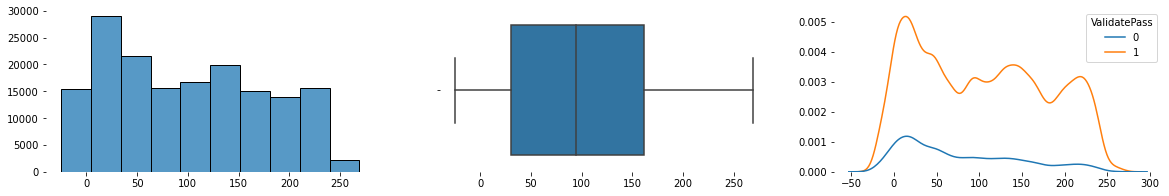

In [17]:
target='ValidatePass'
textlab='# of Student'
textlab_tar='# of Students'

display_unq(df,'date_assignment',target,10,'num','date_assignment',textlab,textlab_tar)

In [ ]:
display_unq(df,'sum_click',target,10,'num','Sum of Clicks',textlab,textlab_tar)

In [ ]:
display_unq(df,'weight',target,10,'num','Weight',textlab,textlab_tar)

In [ ]:
display_unq(df,'module_presentation_length',target,10,'num','module_presentation_length',textlab,textlab_tar)

In [ ]:
display_unq(df,'date_submitted',target,10,'num','date_submitted',textlab,textlab_tar)

In [ ]:
display_unq(df,'score',target,10,'num','score',textlab,textlab_tar)

In [ ]:

display_unq(df,'studied_credits',target,10,'num','studied_credits',textlab,textlab_tar)

In [ ]:
display_unq(df,'date_registration',target,10,'num','date_registration',textlab,textlab_tar)

In [ ]:
display_unq(df,'date_unregistration',target,10,'num','date_unregistration',textlab,textlab_tar)

In [ ]:
display_unq(df,'num_of_prev_attempts',target,10,'char','num_of_prev_attempts',textlab,textlab_tar)

In [ ]:
display_unq(df,'final_result',target,10,'char','final_result',textlab,textlab_tar)

In [ ]:
display_unq(df,'code_module',target,10,'char','code_module',textlab,textlab_tar)

In [ ]:
display_unq(df,'code_presentation',target,10,'char','code_presentation',textlab,textlab_tar)

In [ ]:
display_unq(df,'assessment_type',target,10,'char','assessment_type',textlab,textlab_tar)

In [ ]:
display_unq(df,'region',target,10,'char','region',textlab,textlab_tar)

In [ ]:
display_unq(df,'highest_education',target,10,'char','highest_education',textlab,textlab_tar)

In [ ]:
display_unq(df,'imd_band',target,10,'char','imd_band',textlab,textlab_tar)

In [ ]:
display_unq(df,'age_band',target,10,'char','age_band',textlab,textlab_tar)

In [18]:
df[target].value_counts(normalize=True)

1    0.864066
0    0.135934
Name: ValidatePass, dtype: float64

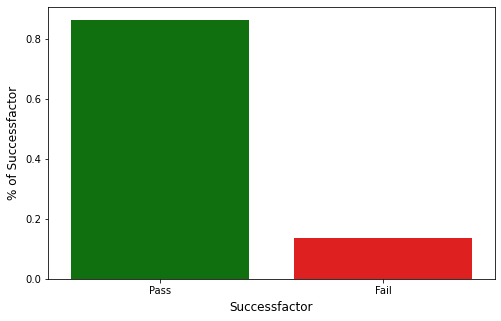

In [19]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
sns.barplot(x=df['ValidatePass'].unique(), y=df['ValidatePass'].value_counts(normalize=True), palette=['green', 'red'])
plt.xlabel("Successfactor", fontsize = 12, labelpad = 5)
plt.ylabel("% of Successfactor", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail']);

In [20]:
#Define the function to identify the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:

colout = ['sum_click','date_submitted','score','studied_credits','date_registration']
for column in colout:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])

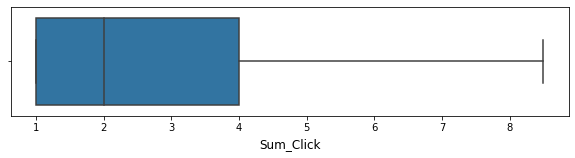

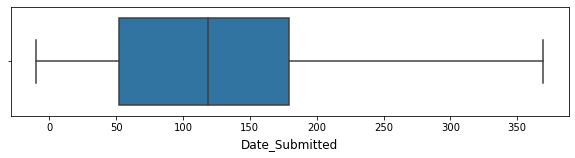

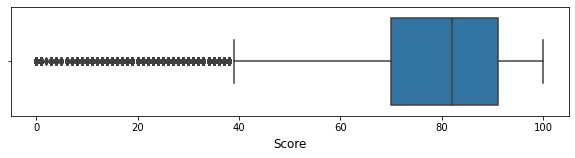

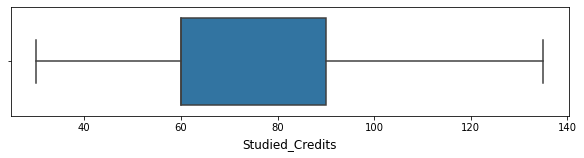

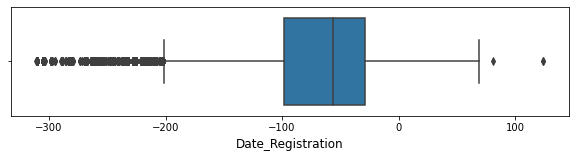

In [22]:
coloutcheck = ['sum_click','date_submitted','score','studied_credits','date_registration']
for i in coloutcheck:
    plt.figure(figsize=(10,2)) 
    sns.boxplot(data=df,x=df[i]) #,x='is_canceled')
    plt.xlabel(i.title(), fontsize = 12, labelpad = 5)

In [23]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = df.isnull().sum()[df.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2)))

****Missing Values in the Dataset****
*************************************
80 Missing values in score which is 0.05% of total data
10080 Missing values in imd_band which is 6.11% of total data
1 Missing values in date_registration which is 0.0% of total data
159096 Missing values in date_unregistration which is 96.36% of total data


In [24]:
df['score']=df['score'].fillna(df['score'].median())
df['date_registration']=df['date_registration'].fillna(df['date_registration'].median())
df['imd_band']=df['imd_band'].fillna(df['imd_band'].mode()[0])
df.drop('date_unregistration',axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  object 
 1   code_presentation           165109 non-null  object 
 2   id_student                  165109 non-null  int64  
 3   id_site                     165109 non-null  int64  
 4   date_assignment             165109 non-null  int64  
 5   sum_click                   165109 non-null  float64
 6   activity_type               165109 non-null  object 
 7   id_assessment               165109 non-null  int64  
 8   assessment_type             165109 non-null  object 
 9   weight                      165109 non-null  float64
 10  module_presentation_length  165109 non-null  int64  
 11  date_submitted              165109 non-null  float64
 12  is_banked                   165109 non-null  int64  
 13  score         

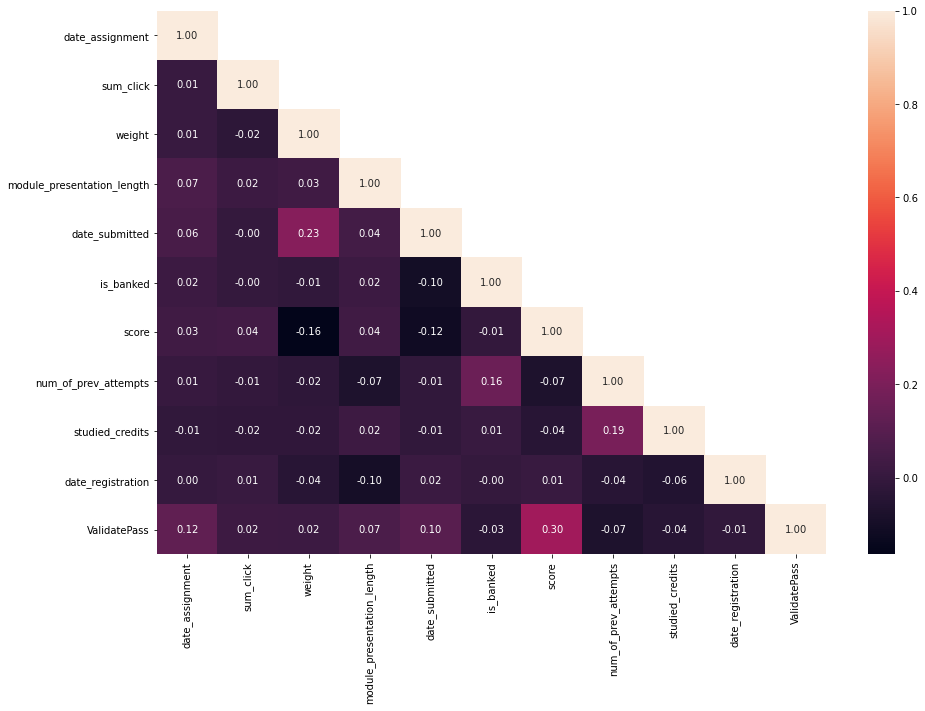

In [26]:
#Heat map - Relationalship analysis
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['id_student','id_site','id_assessment'],axis=1).corr(),mask=np.triu(df.drop(['id_student','id_site','id_assessment'],axis=1).corr(),+1),fmt='.2f',annot=True);

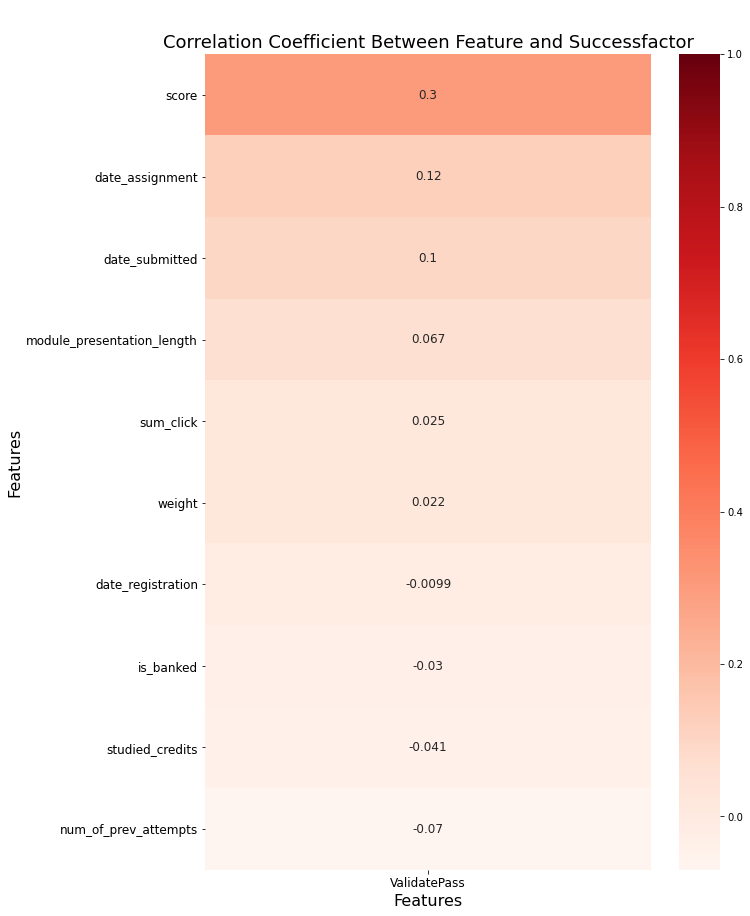

In [28]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(10,15))
ax = sns.heatmap(df.drop(['id_student','id_site','id_assessment'],axis=1).corr()[[target]].sort_values(target, ascending=False), annot = True, annot_kws = {"size":12}, cmap='Reds')
ax.set_title('Correlation Coefficient Between Feature and Successfactor', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  object 
 1   code_presentation           165109 non-null  object 
 2   id_student                  165109 non-null  int64  
 3   id_site                     165109 non-null  int64  
 4   date_assignment             165109 non-null  int64  
 5   sum_click                   165109 non-null  float64
 6   activity_type               165109 non-null  object 
 7   id_assessment               165109 non-null  int64  
 8   assessment_type             165109 non-null  object 
 9   weight                      165109 non-null  float64
 10  module_presentation_length  165109 non-null  int64  
 11  date_submitted              165109 non-null  float64
 12  is_banked                   165109 non-null  int64  
 13  score         

In [30]:
Modeldf = df.drop(['id_student','id_site','id_assessment','final_result'],axis=1)


In [31]:
Modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  object 
 1   code_presentation           165109 non-null  object 
 2   date_assignment             165109 non-null  int64  
 3   sum_click                   165109 non-null  float64
 4   activity_type               165109 non-null  object 
 5   assessment_type             165109 non-null  object 
 6   weight                      165109 non-null  float64
 7   module_presentation_length  165109 non-null  int64  
 8   date_submitted              165109 non-null  float64
 9   is_banked                   165109 non-null  int64  
 10  score                       165109 non-null  float64
 11  gender                      165109 non-null  object 
 12  region                      165109 non-null  object 
 13  highest_educat

In [ ]:
pip list

In [32]:
from sklearn import preprocessing

vars = ['code_module',
'code_presentation',
'activity_type',
'assessment_type',
'region',
'highest_education',
'imd_band',
'age_band',
'final_result']

label_encoder = preprocessing.LabelEncoder()

for i in vars:
    Modeldf[i]= label_encoder.fit_transform(df[i])
    print(Modeldf)



        code_module code_presentation  date_assignment  sum_click  \
0                 5             2013J              153        1.0   
1                 3             2013B              140        1.0   
2                 4             2014B              102        1.0   
3                 3             2013B                1        2.0   
4                 3             2013J              -15        1.0   
...             ...               ...              ...        ...   
165104            4             2014J              228        2.0   
165105            5             2013J               20        8.0   
165106            5             2014B               40        4.0   
165107            1             2013J              -10        1.0   
165108            5             2014J               89        2.0   

       activity_type assessment_type  weight  module_presentation_length  \
0            subpage             TMA    12.5                         268   
1            subpag

        code_module  code_presentation  date_assignment  sum_click  \
0                 5                  1              153        1.0   
1                 3                  0              140        1.0   
2                 4                  2              102        1.0   
3                 3                  0                1        2.0   
4                 3                  1              -15        1.0   
...             ...                ...              ...        ...   
165104            4                  3              228        2.0   
165105            5                  1               20        8.0   
165106            5                  2               40        4.0   
165107            1                  1              -10        1.0   
165108            5                  3               89        2.0   

        activity_type assessment_type  weight  module_presentation_length  \
0                  17             TMA    12.5                         268   
1    

        code_module  code_presentation  date_assignment  sum_click  \
0                 5                  1              153        1.0   
1                 3                  0              140        1.0   
2                 4                  2              102        1.0   
3                 3                  0                1        2.0   
4                 3                  1              -15        1.0   
...             ...                ...              ...        ...   
165104            4                  3              228        2.0   
165105            5                  1               20        8.0   
165106            5                  2               40        4.0   
165107            1                  1              -10        1.0   
165108            5                  3               89        2.0   

        activity_type  assessment_type  weight  module_presentation_length  \
0                  17                2    12.5                         268   
1  

        code_module  code_presentation  date_assignment  sum_click  \
0                 5                  1              153        1.0   
1                 3                  0              140        1.0   
2                 4                  2              102        1.0   
3                 3                  0                1        2.0   
4                 3                  1              -15        1.0   
...             ...                ...              ...        ...   
165104            4                  3              228        2.0   
165105            5                  1               20        8.0   
165106            5                  2               40        4.0   
165107            1                  1              -10        1.0   
165108            5                  3               89        2.0   

        activity_type  assessment_type  weight  module_presentation_length  \
0                  17                2    12.5                         268   
1  

In [33]:
Modeldf['gender'] = Modeldf['gender'].map({'M': 1, 'F':0})
Modeldf['disability'] = Modeldf['disability'].map({'Y': 1, 'N':0})

In [34]:
Modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165109 entries, 0 to 165108
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 165109 non-null  int32  
 1   code_presentation           165109 non-null  int32  
 2   date_assignment             165109 non-null  int64  
 3   sum_click                   165109 non-null  float64
 4   activity_type               165109 non-null  int32  
 5   assessment_type             165109 non-null  int32  
 6   weight                      165109 non-null  float64
 7   module_presentation_length  165109 non-null  int64  
 8   date_submitted              165109 non-null  float64
 9   is_banked                   165109 non-null  int64  
 10  score                       165109 non-null  float64
 11  gender                      165109 non-null  int64  
 12  region                      165109 non-null  int32  
 13  highest_educat

In [35]:
Modeldf.isnull().sum().sum()

0

In [38]:
import pandas as pd;import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score,roc_curve,accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from IPython.display import HTML 
from sklearn.metrics import precision_recall_fscore_support as score

In [39]:
def display_dataframe(df):
    numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, np.number))

    # Dict used to center the table headers
    d = dict(selector="th",
        props=[('text-align', 'center')])

    # Style
    display(df.style.set_properties(subset=df.columns[numeric_col_mask], # right-align the numeric columns and set their width
                            **{'width':'5em', 'height':'3em','text-align':'right','border-color': 'white','border-style' :'solid'})\
            .set_properties(subset=df.columns[~numeric_col_mask], # left-align the non-numeric columns and set their width
                            **{'width':'5em', 'text-align':'left'})\
            .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                    subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])\
            .hide_index()\
#            .highlight_max('color: green')\
            .set_table_styles([d])) # center the header

In [40]:
#AUC and ROC Value
def roc_model(model_name,x,y):
    # predict probabilities
    probs = model_name.predict_proba(x)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y, probs)
    fpr, tpr, _ = roc_curve(y, probs)
    return probs,auc,fpr,tpr

In [41]:
def con_mat(y_train,y_predict_train,y_test,y_predict_test):
    fig, axis=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(10,4)
    fig.tight_layout()

    cm=confusion_matrix(y_train,y_predict_train,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
    columns = [i for i in ["Fail","Pass"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[0])
    axis[0].title.set_text('Confustion Matrix - Train Data')

    cm=confusion_matrix(y_test,y_predict_test,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
    columns = [i for i in ["Fail","Pass"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[1])
    axis[1].title.set_text('Confustion Matrix - Test Data')

In [42]:
def scores_train_test(model,X_train,X_test,y_train,y_test,y_predict_train,y_predict_test,mname,model_name):
    #model=bgcl
    from IPython.display import HTML 
    from sklearn.metrics import precision_recall_fscore_support as score

    s = [[None for j in range(6)] for i in range(2)]

    print(model_name)
    print('********************************\n')

    #model_name = str(model).split('(')[0]
    s[0][0] = model_name + '_' + mname +'_Train'
    s[1][0] = model_name + '_' + mname +'_Test'
    
    report_train = classification_report(y_train, y_predict_train, output_dict=True)
    report_test = classification_report(y_test, y_predict_test, output_dict=True)

    s[0][1]=round(report_train['1']['precision']*100,2)
    s[1][1]=round(report_test['1']['precision']*100,2)

    s[0][2]=round(report_train['1']['recall']*100,2)
    s[1][2]=round(report_test['1']['recall']*100,2)

    s[0][3]=round(report_train['1']['f1-score']*100,2)
    s[1][3]=round(report_test['1']['f1-score']*100,2)

    s[0][4]=round(report_train['accuracy']*100,2)
    s[1][4]=round(report_test['accuracy']*100,2)

    probs, auc, fpr, tpr = roc_model(model,X_train,y_train)
    probst, auc1, fpr1, tpr1 = roc_model(model,X_test,y_test)

    s[0][5]=round(auc*100,2)
    s[1][5]=round(auc1*100,2)

    df = pd.DataFrame(data=s,columns=['Scores','Precision','Recall','F-Score','Accuracy','AUC'])

    con_mat(y_train,y_predict_train,y_test,y_predict_test)

    plt.figure(figsize=(5,5))

    plt.plot(fpr,tpr, marker='o', label='AUC - Train:' + str(s[0][5]))
    plt.plot(fpr1,tpr1, marker='o', label='AUC - Test:' + str(s[1][5]))

    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')

    display_dataframe(df)
    return(df)

In [43]:
def con_mat_r(y_train,y_predict_train,y_test,y_predict_test,nc,he,wi,tit):
    nc = len(y_predict_train)

    fig, axis=plt.subplots(nrows=nc,ncols=2)
    fig.set_size_inches(he,wi)
    fig.tight_layout()

    
    c=0
    for i in y_predict_train:
        cm=confusion_matrix(y_train,i,labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
        columns = [i for i in ["Fail","Pass"]])

        sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[c][0])
        axis[c][0].title.set_text(tit[c] + ' - Train Data')
        c=c+1

    c=0
    for i in y_predict_test:
        cm=confusion_matrix(y_test,i,labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["Fail","Pass"]],
        columns = [i for i in ["Fail","Pass"]])

        sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[c][1])
        axis[c][1].title.set_text(tit[c] + ' - Test Data')
        c=c+1


### Split the data for training and testing

In [44]:
X = Modeldf.drop('ValidatePass',axis=1)
y = Modeldf['ValidatePass']

In [ ]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=9)
# X_full, y_full = sm.fit_resample(X,y.ravel())

# print('After OverSampling, the shape of train_X: {}'.format(X_full.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_full.shape))
 
# print("After OverSampling, counts of label '1': {}".format(sum(y_full == 1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_full == 0)))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.15,random_state=9)
#X_train, X_test, y_train, y_test = train_test_split(X_full,y_full,stratify=y_full,test_size=0.15,random_state=9)

### Oversample using SMOTE

In [ ]:
#pip install imblearn

In [ ]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=9)
# X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [46]:
X_test.shape

(24767, 21)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [48]:
sc_train = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(sc_train, index=X_train.index, columns=X_train.columns)

In [49]:
sc_test = psc_test = scaler.transform(X_test)
X_test_sc = pd.DataFrame(sc_test, index=X_test.index, columns=X_test.columns)

In [50]:
# invoke the LinearRegression function
lgr_model = LogisticRegression(random_state=0)
lgr_model.fit(X_train_sc,y_train)

lgr_train=lgr_model.predict(X_train_sc)
lgr_test=lgr_model.predict(X_test_sc)
#lgr_model.fit(X_train,y_train)

#lgr_train=lgr_model.predict(X_train)
#lgr_test=lgr_model.predict(X_test)

LogisticRegression
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LogisticRegression_Base_Train,88.02,98.51,92.97,87.13,78.37
LogisticRegression_Base_Test,88.13,98.57,93.06,87.29,78.72


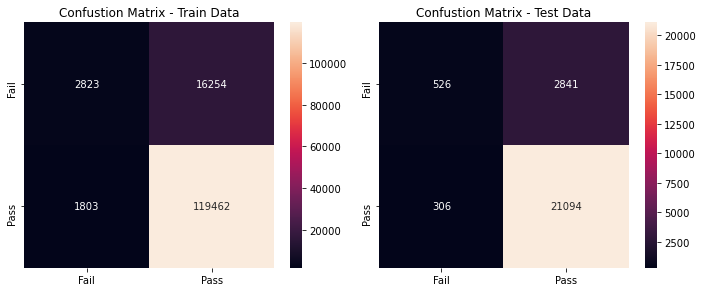

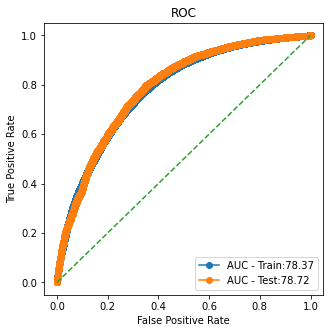

In [51]:
res_df = scores_train_test(lgr_model,X_train_sc,X_test_sc,y_train,y_test,lgr_train,lgr_test,'Base','LogisticRegression')

In [52]:
import pickle

lgr_model_file = 'lgr_model.pkl'

with open(lgr_model_file,'wb') as f:
    pickle.dump(lgr_model, f)
    